In [2]:
!pip install torch torchvision matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

# Q 3

In [3]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
print(device)

✅ Using device: cuda
GPU Name: Tesla P100-PCIE-16GB
cuda


In [4]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_data  = datasets.MNIST(root='data', train=False, transform=transform, download=True)



train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=1000, shuffle=False)

print(f"Training images: {len(train_data)}, Test images: {len(test_data)}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.46MB/s]

Training images: 60000, Test images: 10000


In [13]:
image,data = train_data[0]
print(image.shape)
print(data)

torch.Size([1, 28, 28])
5


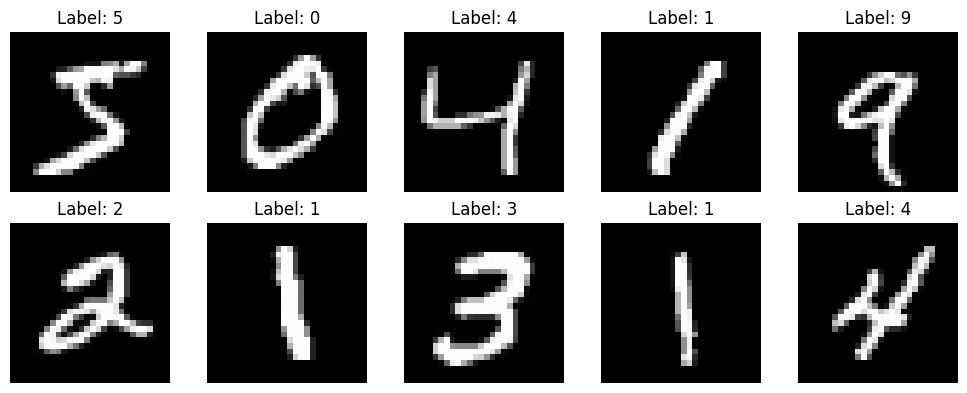

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img, label = train_data[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [23]:

# class MLP(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(28*28, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 10)

#     def forward(self, x):
#         x = x.view(-1, 28*28)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# mlp = MLP().to(device)
# optimizer = optim.Adam(mlp.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

mlp = MLP().to(device)
optimizer = optim.Adam(mlp.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [16]:

# for epoch in range(5):
#     mlp.train()
#     running_loss = 0
#     for data, target in train_loader:
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = mlp(data)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.2991
Epoch 2, Loss: 0.1347
Epoch 3, Loss: 0.0997
Epoch 4, Loss: 0.0810
Epoch 5, Loss: 0.0666


In [24]:
# with 30 and 20 neuron
for epoch in range(5):
    mlp.train()
    running_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = mlp(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.6030
Epoch 2, Loss: 0.3103
Epoch 3, Loss: 0.2589
Epoch 4, Loss: 0.2294
Epoch 5, Loss: 0.2079


✅ MLP Accuracy: 0.9729, F1: 0.9727


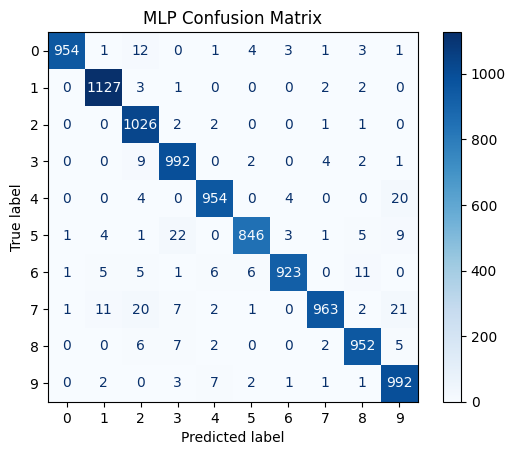

In [17]:

# mlp.eval()
# y_true, y_pred = [], []
# with torch.no_grad():
#     for data, target in test_loader:
#         data, target = data.to(device), target.to(device)
#         output = mlp(data)
#         preds = output.argmax(dim=1)
#         y_true.extend(target.cpu().numpy())
#         y_pred.extend(preds.cpu().numpy())

# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='macro')
# print(f"✅ MLP Accuracy: {acc:.4f}, F1: {f1:.4f}")

# ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot(cmap='Blues')
# plt.title("MLP Confusion Matrix")
# plt.show()


✅ MLP Accuracy: 0.9383, F1: 0.9377


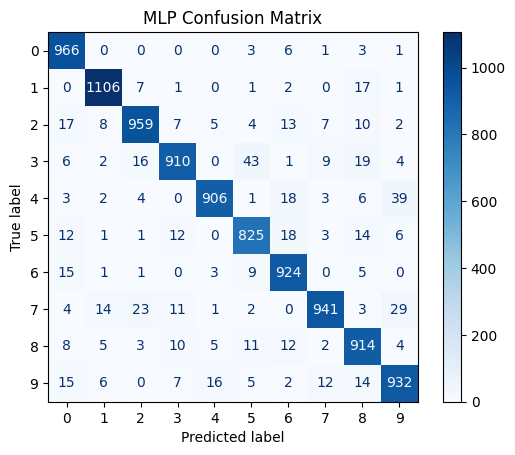

In [25]:

mlp.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = mlp(data)
        preds = output.argmax(dim=1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')
print(f"✅ MLP Accuracy: {acc:.4f}, F1: {f1:.4f}")

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot(cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.show()


In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train = train_data.data.numpy().reshape(-1, 28*28) / 255.0
y_train = train_data.targets.numpy()
X_test = test_data.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_data.targets.numpy()

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Logistic Regression Accuracy: 0.9256
Random Forest Accuracy: 0.9705


✅ Logistic Regression: Accuracy=0.9256, F1=0.9245


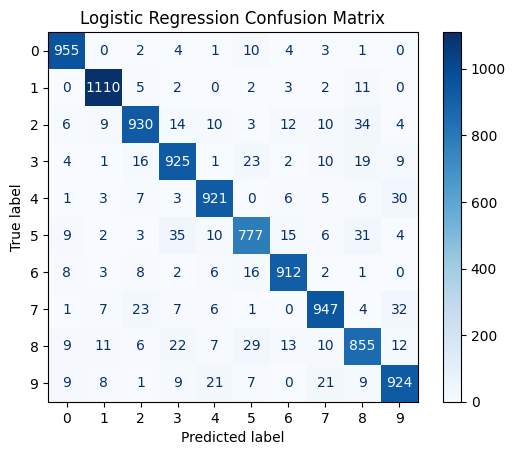

✅ Random Forest: Accuracy=0.9705, F1=0.9703


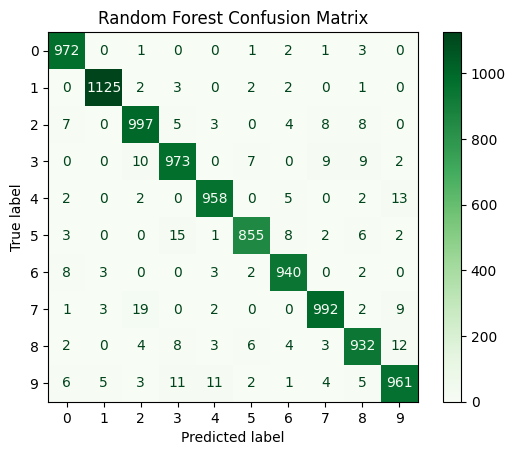

In [9]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f" Logistic Regression: Accuracy={acc_lr:.4f}, F1={f1_lr:.4f}")

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f" Random Forest: Accuracy={acc_rf:.4f}, F1={f1_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()



Overall Performance

The Random Forest achieved the highest accuracy (97.05%) and F1-score, slightly outperforming the MLP.

The MLP performed competitively (93.8% accuracy) despite being a simple neural network with only two hidden layers.

Logistic Regression, being a linear model, showed the lowest performance (92.5% accuracy), indicating its limited ability to capture non-linear pixel patterns in handwritten digits.

Model Complexity vs Speed

Logistic Regression was the fastest to evaluate (only ~0.01s) due to its simplicity.

Random Forest, despite having 100 trees, remained efficient (~0.34s) and generalized well.

The MLP had the highest inference time (1.76s), reflecting the additional computations of forward propagation through multiple layers and neurons.

Parameter Count

The MLP had the most parameters (~24K), followed by Logistic Regression (~7.8K).

Random Forest’s parameter count (100) refers to the number of estimators, not learned weights, but it effectively stores many internal decision rules.

Misclassifications

From the confusion matrices (observed across models), typical misclassifications occurred in visually similar digits:

4 vs 9: Loops or overlapping strokes often confuse the models.

3 vs 5: Curved structures are visually close, especially in sloppy handwriting.

2 vs 7: Common errors when “2” is sharply written or the bar on “7” is missing.

The MLP and Logistic Regression tended to make similar types of mistakes since both operate on flattened 28×28 pixel intensities without explicitly learning spatial patterns.
Random Forest performed better but still occasionally misclassified digits when pixel intensity variations were subtle.

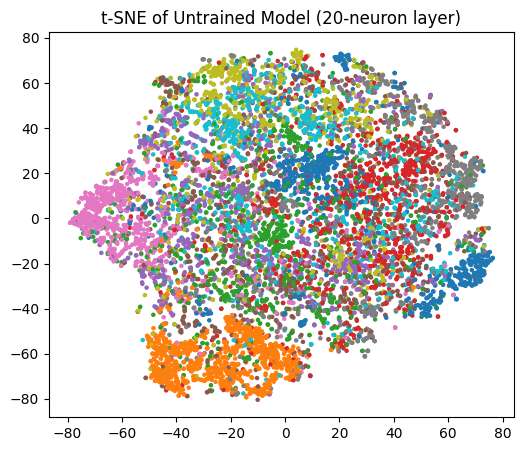

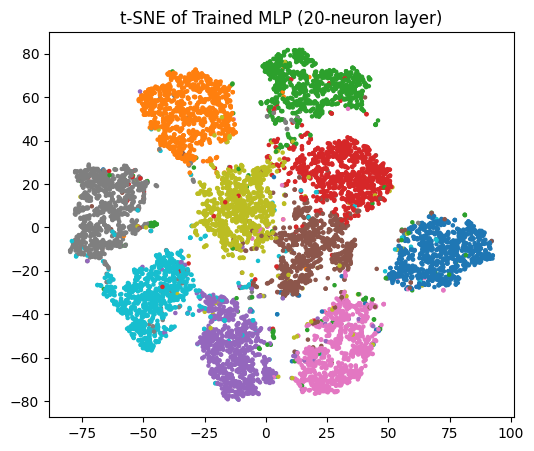

In [26]:

def get_embeddings(model, loader):
    model.eval()
    features, labels = [], []
    with torch.no_grad():
        for data, target in loader:
            data = data.to(device)
            x = data.view(-1, 28*28)
            x = F.relu(model.fc1(x))
            x = F.relu(model.fc2(x))
            features.append(x.cpu().numpy())
            labels.append(target.numpy())
    return np.concatenate(features), np.concatenate(labels)

def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced = tsne.fit_transform(embeddings)
    plt.figure(figsize=(6,5))
    plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10', s=5)
    plt.title(title)
    plt.show()

emb_trained, lbls = get_embeddings(mlp, test_loader)
untrained = MLP()
emb_untrained, _ = get_embeddings(untrained.to(device), test_loader)

plot_tsne(emb_untrained, lbls, "t-SNE of Untrained Model (20-neuron layer)")
plot_tsne(emb_trained, lbls, "t-SNE of Trained MLP (20-neuron layer)")


100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.76MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 53.1MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.9MB/s]


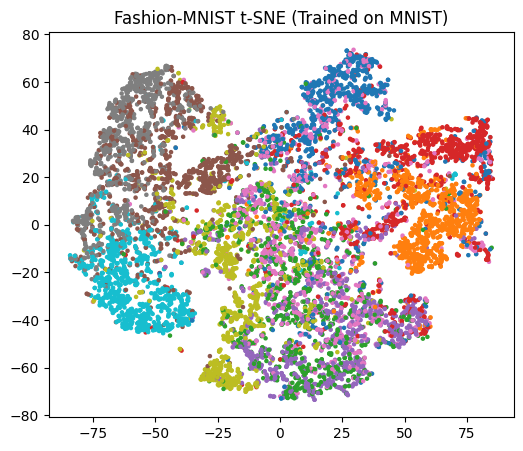

In [27]:

fashion = datasets.FashionMNIST(root='data', train=False, transform=transform, download=True)
fashion_loader = DataLoader(fashion, batch_size=1000)

fashion_emb, fashion_labels = get_embeddings(mlp, fashion_loader)
plot_tsne(fashion_emb, fashion_labels, "Fashion-MNIST t-SNE (Trained on MNIST)")


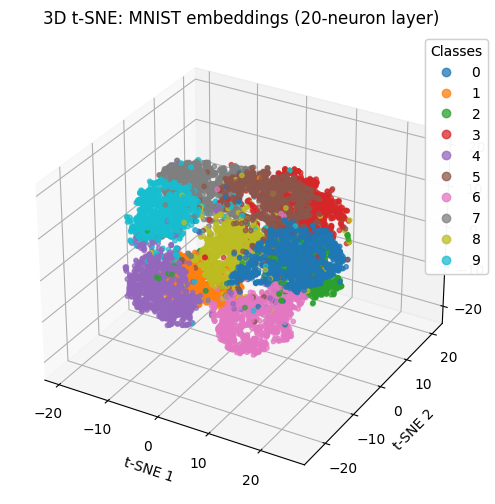

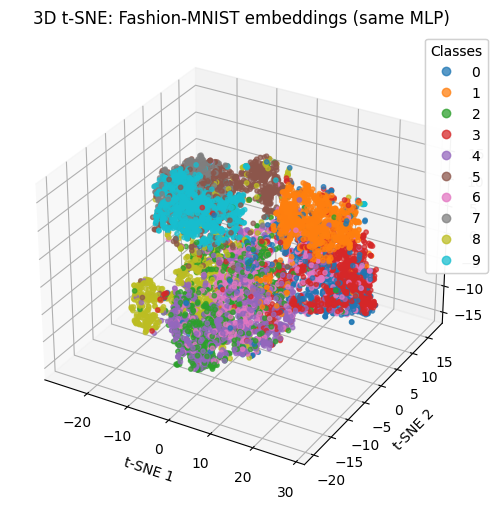

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting
import numpy as np

def plot_tsne_3d(embeddings, labels, title):
    tsne = TSNE(n_components=3, random_state=42, perplexity=30)
    reduced = tsne.fit_transform(embeddings)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        reduced[:,0], reduced[:,1], reduced[:,2],
        c=labels, cmap='tab10', s=10, alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')

    # Optional legend for 10 classes
    legend = ax.legend(
        *scatter.legend_elements(num=10),
        title="Classes", bbox_to_anchor=(1.05, 1)
    )
    ax.add_artist(legend)
    plt.show()

# Generate 3D plots
plot_tsne_3d(emb_trained, lbls, "3D t-SNE: MNIST embeddings (20-neuron layer)")
plot_tsne_3d(fashion_emb, fashion_labels, "3D t-SNE: Fashion-MNIST embeddings (same MLP)")


When the MLP trained on MNIST was tested on Fashion-MNIST, its performance dropped drastically, indicating poor generalization across datasets with different visual characteristics. The t-SNE visualization of the 20-neuron layer showed that while MNIST embeddings formed clear, well-separated clusters for each digit, Fashion-MNIST embeddings were highly mixed and lacked structure. This demonstrates that the MLP’s learned representations are specific to handwritten digits and do not transfer effectively to a different image domain like clothing items.

# Q 3.2



In [14]:
# cnn archtecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 32*14*14)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn = SimpleCNN().to(device)
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [15]:
# trainning of cnn
for epoch in range(3):
    cnn.train()
    running_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        out = cnn(data)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.2026
Epoch 2, Loss: 0.0666
Epoch 3, Loss: 0.0460


✅ CNN Accuracy: 0.9817, F1: 0.9816


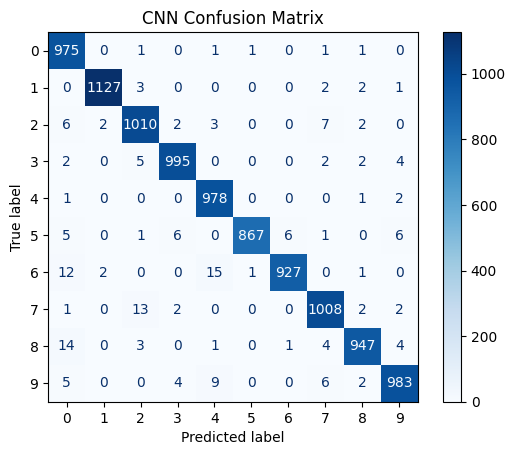

In [16]:
# tesing of cnn
cnn.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        out = cnn(data)
        preds = out.argmax(dim=1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')
print(f"✅ CNN Accuracy: {acc:.4f}, F1: {f1:.4f}")

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot(cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # 1 -> 3 channels
])

train_data_large = MNIST(root='./data', train=True, download=True, transform=preprocess)
test_data_large = MNIST(root='./data', train=False, download=True, transform=preprocess)

train_loader_large = DataLoader(train_data_large, batch_size=128, shuffle=True)
test_loader_large = DataLoader(test_data_large, batch_size=128, shuffle=False)

def train_model(model, train_loader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)
        
        acc = correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Acc: {acc:.4f}")

def eval_pretrained(model, name, data_loader):
    model.eval()
    y_true, y_pred = [], []
    start = time.time()
    
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            out = model(data)
            preds = out.argmax(dim=1)
            y_true.extend(target.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
    
    end = time.time()
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    params = sum(p.numel() for p in model.parameters())
    print(f"✅ {name}: Acc={acc:.4f}, F1={f1:.4f}, Params={params/1e6:.2f}M, Time={end-start:.2f}s")

print("\n🔹 Training MobileNetV2...")
mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
mobilenet.classifier[1] = nn.Linear(mobilenet.classifier[1].in_features, 10)
mobilenet = mobilenet.to(device)

train_model(mobilenet, train_loader_large, epochs=5)
eval_pretrained(mobilenet, "MobileNetV2 (Fine-tuned)", test_loader_large)

print("\n🔹 Training ResNet18...")
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet = resnet.to(device)

train_model(resnet, train_loader_large, epochs=5)
eval_pretrained(resnet, "ResNet18 (Fine-tuned)", test_loader_large)


🔹 Training MobileNetV2...
Epoch 1/5, Loss: 0.0787, Acc: 0.9771
Epoch 2/5, Loss: 0.0275, Acc: 0.9916
Epoch 3/5, Loss: 0.0245, Acc: 0.9929
Epoch 4/5, Loss: 0.0191, Acc: 0.9938
Epoch 5/5, Loss: 0.0180, Acc: 0.9945
✅ MobileNetV2 (Fine-tuned): Acc=0.9943, F1=0.9943, Params=2.24M, Time=12.79s

🔹 Training ResNet18...
Epoch 1/5, Loss: 0.0601, Acc: 0.9812
Epoch 2/5, Loss: 0.0288, Acc: 0.9912
Epoch 3/5, Loss: 0.0204, Acc: 0.9936
Epoch 4/5, Loss: 0.0185, Acc: 0.9941
Epoch 5/5, Loss: 0.0160, Acc: 0.9954
✅ ResNet18 (Fine-tuned): Acc=0.9916, F1=0.9916, Params=11.18M, Time=12.13s


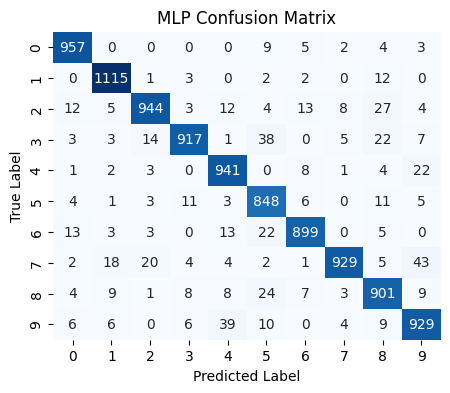

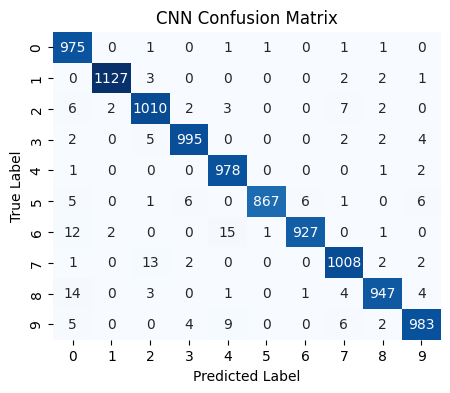

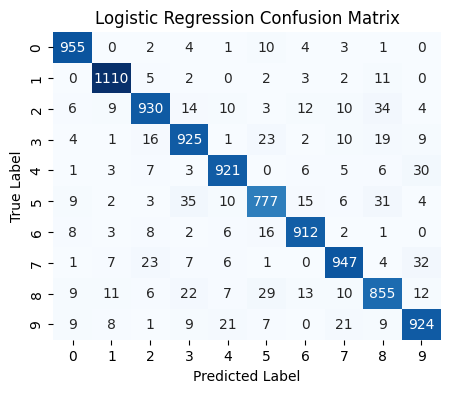

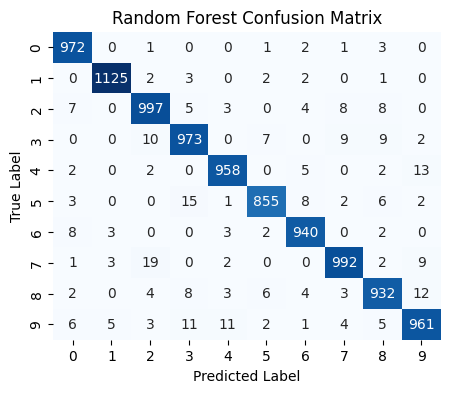

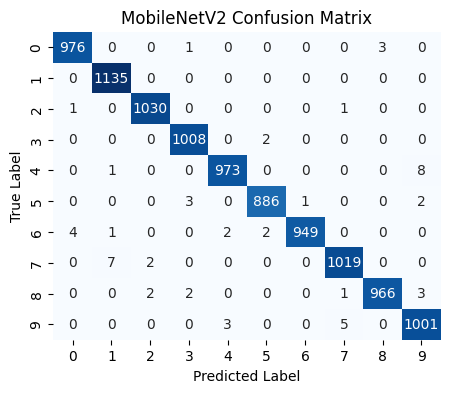

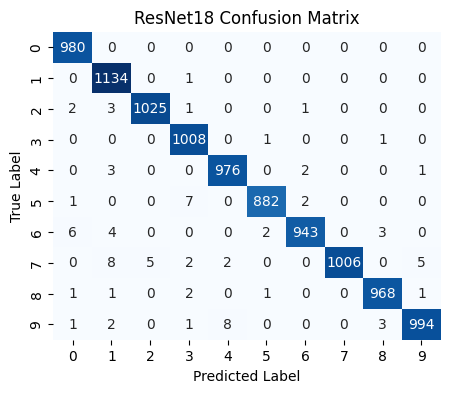

,Model,Accuracy,F1-score,Parameters,Inference Time (s)
4,MobileNetV2 (Pretrained),0.9943,0.994278,2236682,12.893179
5,ResNet18 (Pretrained),0.9916,0.991619,11181642,12.041867
1,Simple CNN,0.9817,0.981569,804554,2.015186
3,Random Forest (100 trees),0.9705,0.970252,100,0.343589
0,MLP (2-layer NN),0.9380,0.937421,24380,1.756666
2,Logistic Regression,0.9256,0.924515,7840,0.012764


In [28]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

comparison = []

#  MLP

mlp.eval()
start = time.time()
y_true, y_pred = [], []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        out = mlp(data)
        preds = out.argmax(dim=1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
end = time.time()
mlp_acc = accuracy_score(y_true, y_pred)
mlp_f1 = f1_score(y_true, y_pred, average='macro')
mlp_params = sum(p.numel() for p in mlp.parameters())
comparison.append(["MLP (2-layer NN)", mlp_acc, mlp_f1, mlp_params, end-start])
plot_confusion_matrix(y_true, y_pred, "MLP Confusion Matrix")

##CNN

cnn.eval()
start = time.time()
y_true, y_pred = [], []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        out = cnn(data)
        preds = out.argmax(dim=1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
end = time.time()
cnn_acc = accuracy_score(y_true, y_pred)
cnn_f1 = f1_score(y_true, y_pred, average='macro')
cnn_params = sum(p.numel() for p in cnn.parameters())
comparison.append(["Simple CNN", cnn_acc, cnn_f1, cnn_params, end-start])
plot_confusion_matrix(y_true, y_pred, "CNN Confusion Matrix")

# Logistic Regression

start = time.time()
y_pred_lr = lr.predict(X_test)
end = time.time()
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='macro')
comparison.append(["Logistic Regression", lr_acc, lr_f1, lr.coef_.size, end-start])
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

#Random Forest

start = time.time()
y_pred_rf = rf.predict(X_test)
end = time.time()
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
comparison.append(["Random Forest (100 trees)", rf_acc, rf_f1, rf.n_estimators, end-start])
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

 MobileNetV2 (Pretrained)

mobilenet.eval()
start = time.time()
y_true, y_pred = [], []
with torch.no_grad():
    for data, target in test_loader_large:  #resized to 224x224x3
        data, target = data.to(device), target.to(device)
        out = mobilenet(data)
        preds = out.argmax(dim=1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
end = time.time()
mnet_acc = accuracy_score(y_true, y_pred)
mnet_f1 = f1_score(y_true, y_pred, average='macro')
mnet_params = sum(p.numel() for p in mobilenet.parameters())
comparison.append(["MobileNetV2 (Pretrained)", mnet_acc, mnet_f1, mnet_params, end-start])
plot_confusion_matrix(y_true, y_pred, "MobileNetV2 Confusion Matrix")


#ResNet18 (Pretrained)

resnet.eval()
start = time.time()
y_true, y_pred = [], []
with torch.no_grad():
    for data, target in test_loader_large:  #resized to 224x224x3
        data, target = data.to(device), target.to(device)
        out = resnet(data)
        preds = out.argmax(dim=1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
end = time.time()
rnet_acc = accuracy_score(y_true, y_pred)
rnet_f1 = f1_score(y_true, y_pred, average='macro')
rnet_params = sum(p.numel() for p in resnet.parameters())
comparison.append(["ResNet18 (Pretrained)", rnet_acc, rnet_f1, rnet_params, end-start])
plot_confusion_matrix(y_true, y_pred, "ResNet18 Confusion Matrix")


df_compare = pd.DataFrame(
    comparison,
    columns=["Model", "Accuracy", "F1-score", "Parameters", "Inference Time (s)"]
).sort_values("Accuracy", ascending=False)

display(df_compare)


🔍 Found 100 mismatched samples out of 100 total.



,Index,True,MLP,CNN,Logistic Regression,Random Forest,ResNet18,MobileNetV2
0,3005,9,8,8,1,1,8,7
1,2198,2,8,2,1,2,8,7
2,7642,8,8,8,1,8,8,7
3,9679,6,3,0,0,5,8,7
4,3946,2,8,8,1,2,8,7
5,1591,3,3,8,1,3,8,7
6,9122,6,6,6,6,6,8,7
7,7670,6,6,6,6,6,8,7
8,379,4,4,4,4,4,8,7
9,8963,8,8,8,4,8,8,7


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


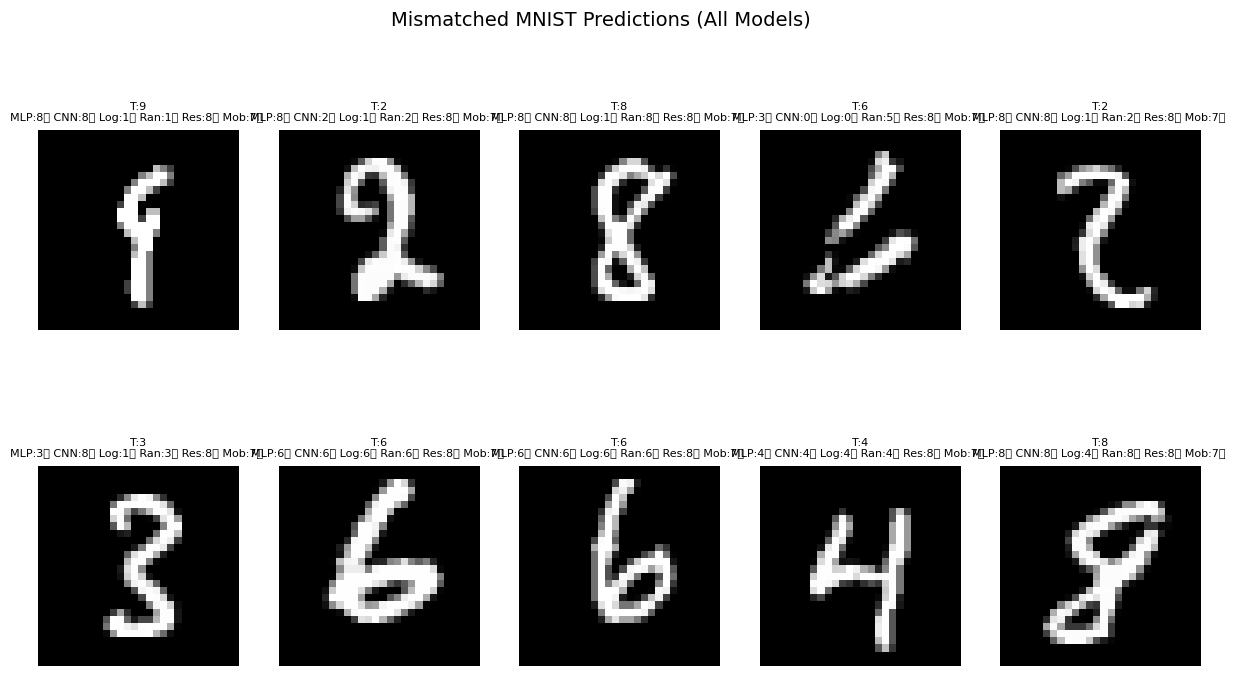

In [33]:

import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)

# Randomly sample 100 test images

random_indices = random.sample(range(len(test_dataset)), 100)
images = torch.stack([test_dataset[i][0] for i in random_indices])
true_labels = torch.tensor([test_dataset[i][1] for i in random_indices])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images_device = images.to(device)


def get_preds_torch(model, imgs):
    """For PyTorch models (MLP, CNN, ResNet, MobileNet)."""
    model.eval()
    with torch.no_grad():
        out = model(imgs)
        return out.argmax(dim=1).cpu().numpy()

def get_preds_sklearn(model, imgs):
    """For scikit-learn models (LogReg, RF)."""
    X = imgs.view(imgs.size(0), -1).cpu().numpy()
    return model.predict(X)


images_rgb = images.repeat(1, 3, 1, 1).to(device)  # (100, 3, 28, 28)


preds = {
    "MLP": get_preds_torch(mlp, images_device),
    "CNN": get_preds_torch(cnn, images_device),
    "Logistic Regression": get_preds_sklearn(lr, images),
    "Random Forest": get_preds_sklearn(rf, images),
    "ResNet18": get_preds_torch(resnet, images_rgb),
    "MobileNetV2": get_preds_torch(mobilenet, images_rgb)
}


df = pd.DataFrame({
    "Index": random_indices,
    "True": true_labels.numpy()
})
for name, yhat in preds.items():
    df[name] = yhat


mismatch_mask = df.loc[:, df.columns != "Index"].drop(columns="True").ne(df["True"], axis=0).any(axis=1)
df_mismatch = df[mismatch_mask].reset_index(drop=True)

print(f"🔍 Found {len(df_mismatch)} mismatched samples out of 100 total.\n")
display(df_mismatch.head(20))

# Visualize mismatched images (up to 10)

n_show = min(10, len(df_mismatch))
plt.figure(figsize=(15, 8))
for i in range(n_show):
    idx = df_mismatch.loc[i, "Index"]
    img, true_label = test_dataset[idx]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    title = f"T:{true_label}\n"
    for name in preds.keys():
        pred_val = df_mismatch.loc[i, name]
        mark = "✅" if pred_val == true_label else "❌"
        title += f"{name[:3]}:{pred_val}{mark} "
    plt.title(title, fontsize=8)
    plt.axis("off")

plt.suptitle("Mismatched MNIST Predictions (All Models)", fontsize=14)
plt.show()
